In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from outliers import handle_outliers

## Test Data

In [2]:
data = np.hstack([-1000, -100, -10, np.random.normal(0,1, 50), 10, 100, 1000])

In [3]:
df = pd.DataFrame(data)

df['type'] = np.random.choice(['cat', 'dog', 'bass'], len(df))
df['size'] = np.random.choice([1,2,3], len(df))

df.head()

,0,type,size
0,-1000.000000,cat,2
1,-100.000000,cat,1
2,-10.000000,cat,2
3,0.474164,dog,3
4,2.758088,dog,2


## Functionality

`handle_outliers` remove outliers from the plot and show them as text boxes. It can be used with most `seaborn` plotting function that works with long-form data.

Please not that only inliers are passed into the plotting function, consequently density estimates, and functionals are only computed on that subset and **not** representative of the whole data.

Notable exceptions are:

- `catplot`
- `countplot`
- `kdeplot`

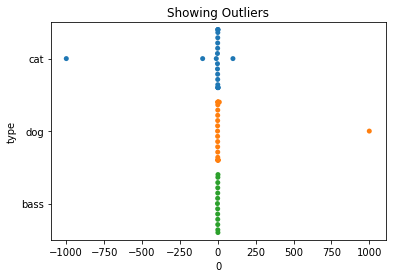

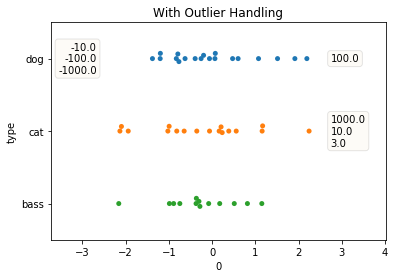

In [4]:
plt.title('Showing Outliers')
sns.swarmplot(data=df, y = 'type', x=0)
plt.show()

plt.title('With Outlier Handling')
handle_outliers(data=df, y = 'type', x=0)
plt.show()

## Different Plotters

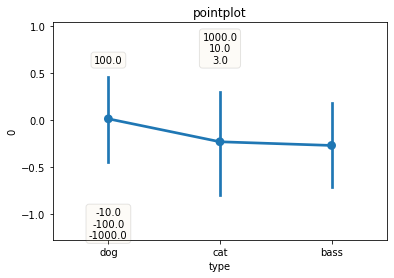

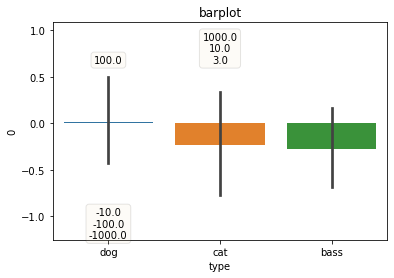

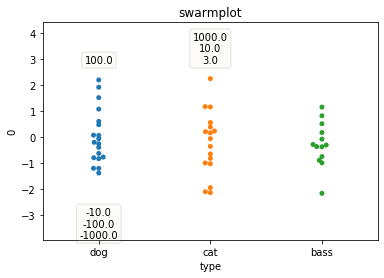

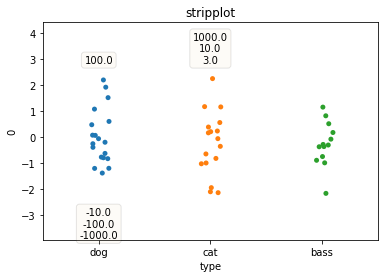

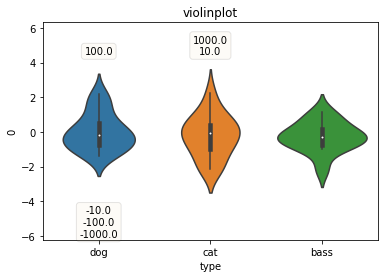

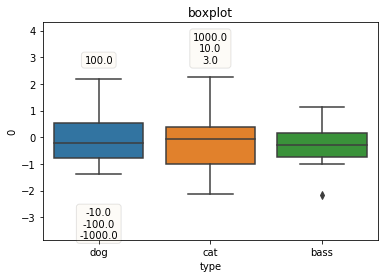

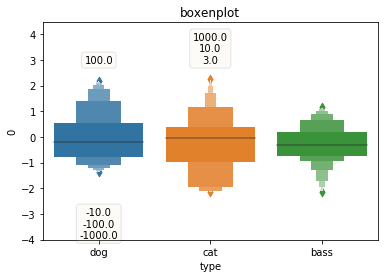

In [5]:
for plotter in (sns.pointplot, sns.barplot, sns.swarmplot, sns.stripplot, sns.violinplot, sns.boxplot, 
                sns.boxenplot):
    plt.title(plotter.__name__)
    handle_outliers(data=df, plotter = plotter, x = 'type', y=0)
    plt.show()

In [ ]:
handle_outliers(data=df[0], plotter=sns.kdeplot, shade=)

## Padding and Margin

Due to the impossibility of determining the size of `matplotlib` text, liberal margins have to be added.

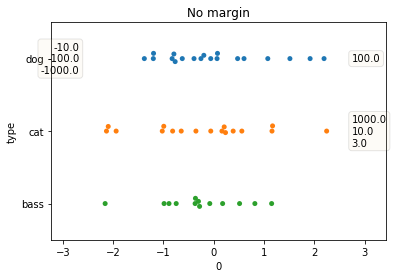

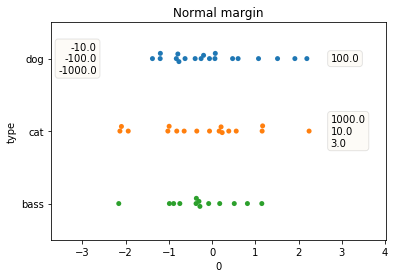

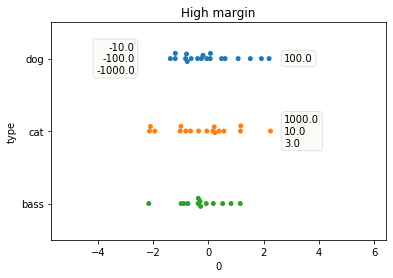

In [6]:
plt.title('No margin')
handle_outliers(data=df, y = 'type', x=0, margin = 0)
plt.show()

plt.title('Normal margin')
handle_outliers(data=df, y = 'type', x=0)
plt.show()

plt.title('High margin')
handle_outliers(data=df, y = 'type', x=0, margin = .5)
plt.show()

## Hue

Due to the aforementioned impossibility of determining the size of `matplotlib` text, it is currently not possible to appropriately plot data with `hue`s.

Rendering text in different colors (which would be the most elegant solution) cannot be done without creating multiple `text`s, which would collide since there extents are unknown.


/home/wendling/workspace/outlier_plotting/outliers.py:104: UserWarning: Hues are not fully supported!
  warnings.warn('Hues are not fully supported!')


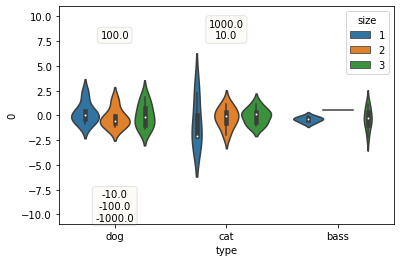

In [7]:
handle_outliers(data=df, plotter = sns.violinplot, x = 'type', y=0, hue='size');